In [3]:
def is_cat(x): return x[0].isupper() 

In [4]:
from fastbook import load_learner

model = load_learner("model.pkl")

In [5]:
m = model.model

In [6]:
m

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [11]:
l = m.get_submodule('0.0')

In [13]:
list(l.parameters())

[Parameter containing:
 tensor([[[[-1.0456e-02, -6.1439e-03, -1.8029e-03,  ...,  5.6601e-02,  1.7052e-02, -1.2715e-02],
           [ 1.1070e-02,  9.5225e-03, -1.0993e-01,  ..., -2.7127e-01, -1.2912e-01,  3.7194e-03],
           [-6.9469e-03,  5.9071e-02,  2.9544e-01,  ...,  5.1967e-01,  2.5625e-01,  6.3523e-02],
           ...,
           [-2.7556e-02,  1.5988e-02,  7.2536e-02,  ..., -3.3288e-01, -4.2064e-01, -2.5789e-01],
           [ 3.0584e-02,  4.0905e-02,  6.2781e-02,  ...,  4.1378e-01,  3.9351e-01,  1.6599e-01],
           [-1.3784e-02, -3.7397e-03, -2.4160e-02,  ..., -1.5076e-01, -8.2304e-02, -5.8759e-03]],
 
          [[-1.1380e-02, -2.6578e-02, -3.4584e-02,  ...,  3.2549e-02,  6.7062e-04, -2.5727e-02],
           [ 4.5715e-02,  3.3636e-02, -1.0449e-01,  ..., -3.1251e-01, -1.6051e-01, -1.2796e-03],
           [-8.0626e-04,  9.8432e-02,  4.0210e-01,  ...,  7.0789e-01,  3.6883e-01,  1.2453e-01],
           ...,
           [-5.5921e-02, -5.2528e-03,  2.7060e-02,  ..., -4.6177e-01,

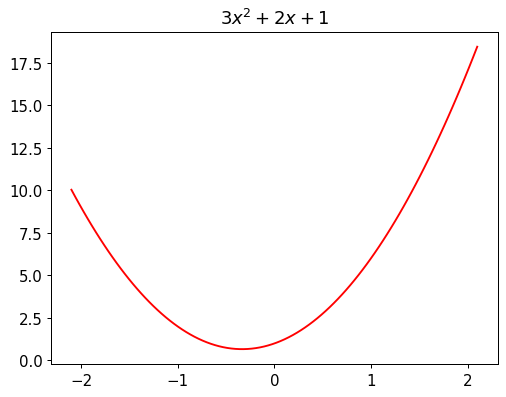

In [15]:
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)
        
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [16]:
def quad(a, b, c, x): return a*x**2 + b*x + c

In [17]:
def mk_quad(a,b,c): return partial(quad, a,b,c)

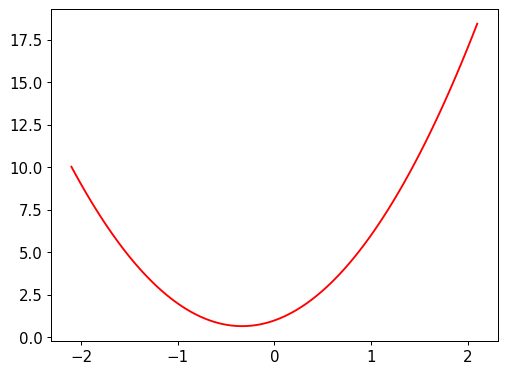

In [18]:
f2 = mk_quad(3,2,1)
plot_function(f2)

In [19]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

In [20]:
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

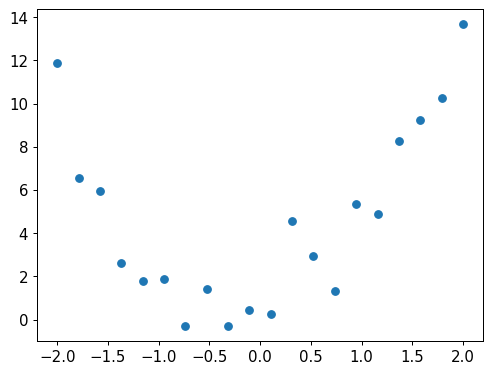

In [21]:
plt.scatter(x,y);

In [22]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [23]:
def mae(preds, acts): return (torch.abs(preds-acts)).mean()

In [24]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [25]:
def quad_mae(params):
    f = mk_quad(*params)
    return mae(f(x), y)

In [42]:
quad_mae([1.1, 1.1, 1.1])

tensor(2.4219, dtype=torch.float64)

In [43]:
abc = torch.tensor([1.1,1.1,1.1])

In [44]:
abc.requires_grad_()

tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

In [45]:
loss = quad_mae(abc)
loss

tensor(2.4219, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [46]:
loss.backward()

In [47]:
abc.grad

tensor([-1.3529, -0.0316, -0.5000])

In [48]:
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_mae(abc)
    
print(f'loss={loss:.2f}')

loss=2.40


In [49]:
for i in range(12):
    loss = quad_mae(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'step={i}; loss={loss:.2f}')

step=0; loss=2.40
step=1; loss=2.36
step=2; loss=2.30
step=3; loss=2.21
step=4; loss=2.11
step=5; loss=1.98
step=6; loss=1.85
step=7; loss=1.72
step=8; loss=1.58
step=9; loss=1.46
step=10; loss=1.35
step=11; loss=1.22


In [50]:
abc

tensor([2.2558, 1.1682, 1.5020], requires_grad=True)